In [1]:
import numpy as np
from matplotlib import pyplot as plt
import importlib

import build.steps as steps
from utils import *

In [39]:
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["figure.dpi"] = 100

In [89]:
iteration_time = 6
record_interval = 0.005
dt = 0.00001

In [90]:
r0 = np.array([
    [ 1, 1,-1,-1],
    [-1, 1, 1,-1],
    [ 0, 0, 0, 0]]);
v0 = np.array([
    [ 0, 0, 0, 0],
    [ 0, 0, 0, 0],
    [ 0, 0, 0, 0]]);
mass = np.array([1, 1, 1, 1]);


perturb0 = np.random.randn(*r0.shape)*np.array([[1,1,0]]).T*0.6
perturb0 = np.array([
    [-0.48290992, -0.29219272,  0.23127537,  0.47800252],
    [-0.43035444, -0.54136676, -0.6982123 , -0.20406436],
    [ 0.        ,  0.        , -0.        ,  0.        ]])

r0 = r0 + perturb0

In [92]:
res = []
for _ in range(6):
    perturb = np.random.randn(*r0.shape)*np.array([[1,1,0]]).T*0.01

    res = steps.simulate(r0 + perturb, v0, 0, mass, iteration_time, dt, record_interval, True, True)
    W = total_energy_over_time(*res[:2], mass)
    B = np.where(abs(W/W[0]-1)> 0.001)[0]
    cut = B[0] if len(B) > 0 else -1
    rs, vs, ts = [np.array(x[:cut]) for x in res]
    runs.append((rs, vs, ts))

100.00%   [ #########################  ]

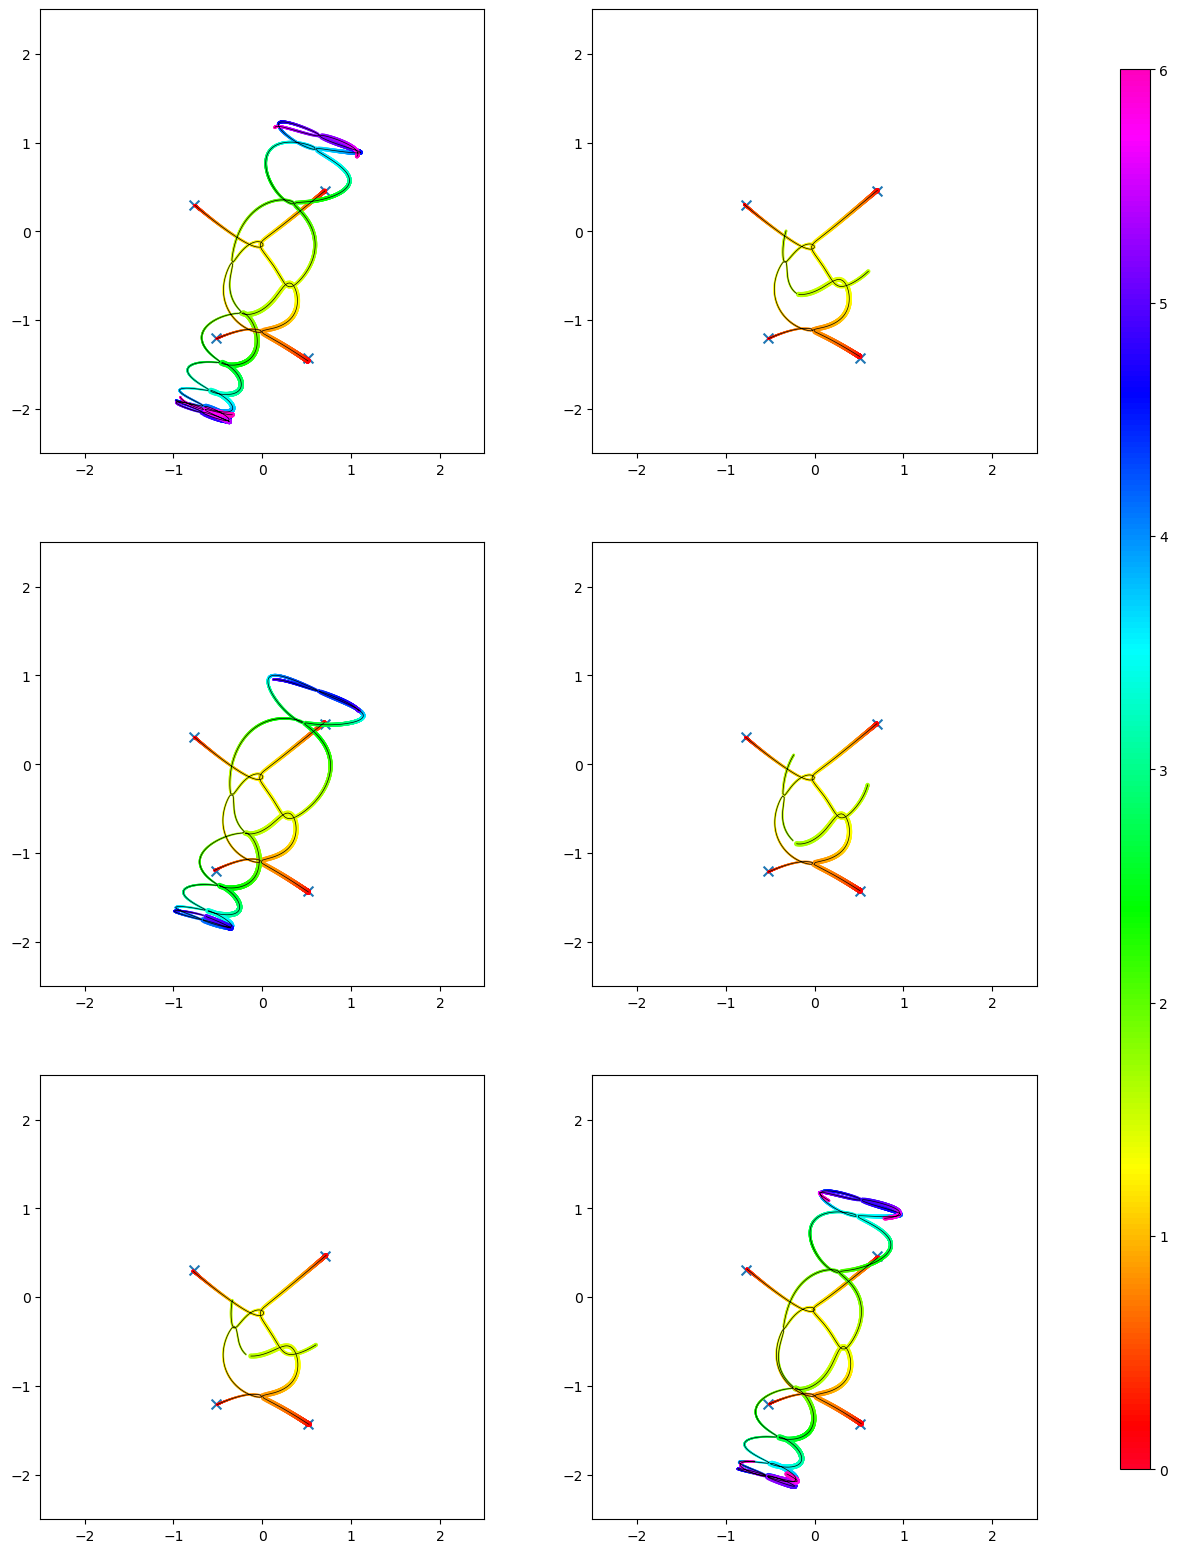

In [95]:
fix, axs = plt.subplots(2, 2, dpi=100, figsize=(15,20))

plt.scatter(r0[0], r0[1], marker='+', s=50)
plt.set_cmap("gist_rainbow")
norm = plt.Normalize(0, iteration_time)

sz = 0.5
rg = 2.5
for i in range(1, 6+1):
    plt.subplot(3, 2, i)
    
    rs, vs, ts = runs[::-1][i-1]
    xs, ys = rs[:, 0], rs[:, 1]
    
    plt.scatter(r0[0], r0[1], marker='x', s=50)
    plt.scatter(xs[:, 0], ys[:, 0], s=8,c=ts, norm=norm);
    plt.scatter(xs[:, 1], ys[:, 1], s=4,c=ts, norm=norm);
    plt.scatter(xs[:, 2], ys[:, 2], s=1,c=ts, norm=norm);
    t = plt.scatter(xs[:, 3], ys[:, 3], s=0.25,c=ts, norm=norm);
    
    plt.plot(xs[:, 0], ys[:, 0], lw=sz,c="k");
    plt.plot(xs[:, 1], ys[:, 1], lw=sz,c="k");
    plt.plot(xs[:, 2], ys[:, 2], lw=sz,c="k");
    plt.plot(xs[:, 3], ys[:, 3], lw=sz,c="k");
    
    plt.xlim(-rg,rg)
    plt.ylim(-rg,rg)
    plt.gca().set_aspect("equal")

fig = plt.gcf()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(t, cax=cbar_ax);

### on the single graph

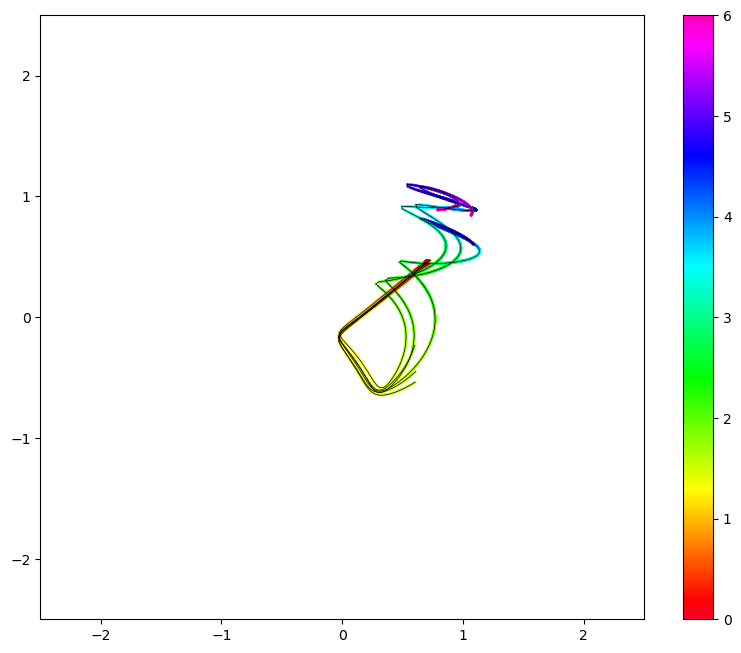

In [102]:
particle = 1

plt.figure(dpi=100, figsize=(10, 8))

plt.set_cmap("gist_rainbow")
norm = plt.Normalize(0, iteration_time)

sz = 0.5
rg = 2.5
for i in range(1, 6+1):
    
    rs, vs, ts = runs[::-1][i-1]
    xs, ys = rs[:, 0], rs[:, 1]
    
    t = plt.scatter(xs[:, particle], ys[:, particle], s=1,c=ts, norm=norm);
    
    plt.plot(xs[:, particle], ys[:, particle], lw=sz,c="k");
    
    plt.xlim(-rg,rg)
    plt.ylim(-rg,rg)
plt.gca().set_aspect("equal")
plt.colorbar();

# Discussion

* From the theory of differential equations, the solution depends continuously on initial conditions for a sufficiently small domain. However, for large domains, in this case, a long time, solutions could be quite different.

* in above trajectories, simulation was cut at the point, where energy deviates by 1% from initial energy. In case of colisions, more precisely short distance between particles, particles have high velocities and high accelerations, so numerical integration is not stable. So we assum further results are not right and we crop at that point.